In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [24]:
import warnings 
warnings.filterwarnings("ignore")

In [25]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [26]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [27]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [28]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   str  
 2   BusinessTravel            1470 non-null   str  
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   str  
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   str  
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   str  
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null   int64
 15

In [29]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [30]:
df.shape

(1470, 35)

In [31]:
df.dtypes

Age                         int64
Attrition                     str
BusinessTravel                str
DailyRate                   int64
Department                    str
DistanceFromHome            int64
Education                   int64
EducationField                str
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                        str
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                       str
JobSatisfaction             int64
MaritalStatus                 str
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                        str
OverTime                      str
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

In [32]:
df.describe().round(2)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.0,1024.87,2.72,65.89,2.73,2.06,...,2.71,80.0,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.0,602.02,1.09,20.33,0.71,1.11,...,1.08,0.0,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.0,1.00,1.00,30.00,1.00,1.00,...,1.00,80.0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.0,491.25,2.00,48.00,2.00,1.00,...,2.00,80.0,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.0,1020.50,3.00,66.00,3.00,2.00,...,3.00,80.0,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.0,1555.75,4.00,83.75,3.00,3.00,...,4.00,80.0,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.0,2068.00,4.00,100.00,4.00,5.00,...,4.00,80.0,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [33]:
df = df.drop(columns=['EmployeeNumber', 'StandardHours', 'EmployeeCount'])


In [34]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [35]:
df_check = df.groupby(['JobLevel', 'Attrition'])['YearsAtCompany'].agg(['mean', 'median', 'max', 'std']).round(2).unstack()

df_check

mean        median       max        std       
Attrition     No    Yes     No   Yes  No Yes     No    Yes
JobLevel                                                  
1           4.24   3.08    4.0   2.0  20  17   3.13   2.89
2           6.91   5.25    6.0   5.0  20  15   4.16   3.65
3           9.35   9.56    9.0   8.5  26  40   5.54   8.58
4          13.76  16.40   12.0  19.0  37  23   9.20   8.82
5          14.53  22.80   15.0  24.0  36  32  10.73  10.85

In [36]:
df_check2 = df.groupby(['Attrition', 'WorkLifeBalance'])['YearsAtCompany'].agg(['mean', 'median', 'max', 'std']).round(2)
df_check2


mean  median  max   std
Attrition WorkLifeBalance                         
No        1                6.85     5.0   29  6.12
          2                7.45     6.0   37  5.90
          3                7.34     5.0   36  6.15
          4                7.59     5.5   34  6.25
Yes       1                5.24     4.0   23  5.28
          2                5.33     4.0   40  6.49
          3                5.18     3.0   33  6.20
          4                4.37     3.0   15  4.03

In [37]:
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})

In [38]:
df.groupby('WorkLifeBalance')['Attrition'].value_counts(normalize=True).round(2)


WorkLifeBalance  Attrition
1                0            0.69
                 1            0.31
2                0            0.83
                 1            0.17
3                0            0.86
                 1            0.14
4                0            0.82
                 1            0.18
Name: proportion, dtype: float64

<Axes: xlabel='DistanceFromHome', ylabel='1'>

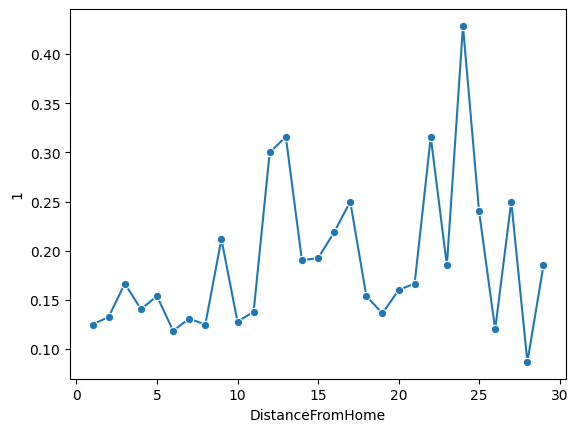

In [44]:
dist = (
    df.groupby('DistanceFromHome')['Attrition']
      .value_counts(normalize=True)
      .unstack()[1]
      .reset_index()
)

sns.lineplot(data=dist, x='DistanceFromHome', y=1, marker='o')

In [46]:
df['DistanceBand'] = pd.cut(df['DistanceFromHome'],bins=[0,5,10,20,30],labels=['Close','Medium','Far','Very Far'])

<Axes: xlabel='DistanceBand', ylabel='1'>

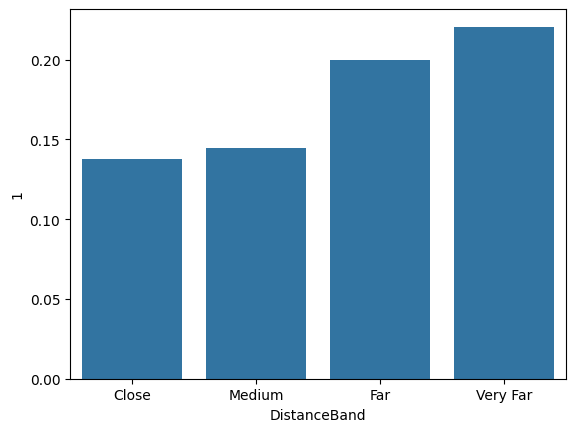

In [49]:
band_rate = (df.groupby('DistanceBand')['Attrition'].value_counts(normalize=True).unstack()[1].reset_index())

sns.barplot(data=band_rate, x='DistanceBand', y=1)

In [50]:
df.groupby('EnvironmentSatisfaction')['Attrition'].value_counts(normalize=True).round(2)

EnvironmentSatisfaction  Attrition
1                        0            0.75
                         1            0.25
2                        0            0.85
                         1            0.15
3                        0            0.86
                         1            0.14
4                        0            0.87
                         1            0.13
Name: proportion, dtype: float64

In [51]:
df.groupby('JobInvolvement')['Attrition'].value_counts(normalize=True).round(2)

JobInvolvement  Attrition
1               0            0.66
                1            0.34
2               0            0.81
                1            0.19
3               0            0.86
                1            0.14
4               0            0.91
                1            0.09
Name: proportion, dtype: float64

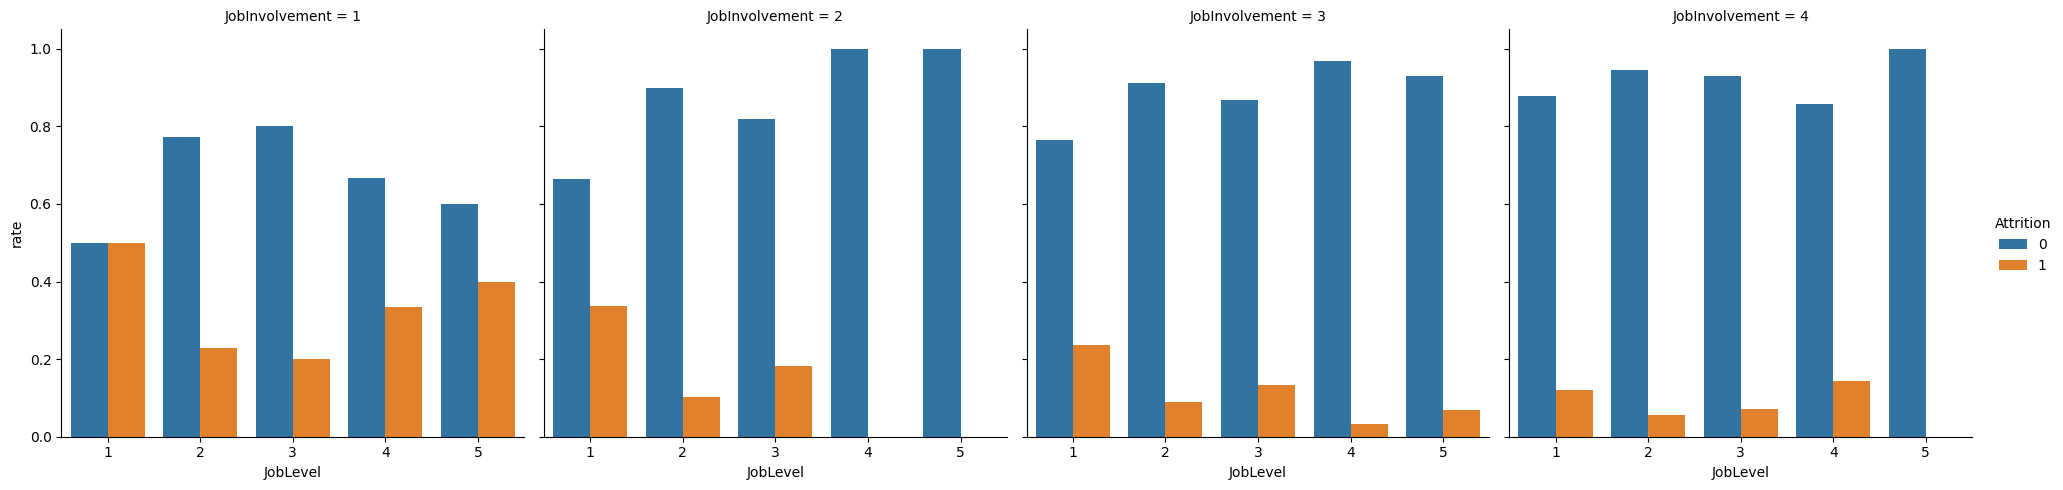

In [52]:
plot_df = (df.groupby(['JobInvolvement','JobLevel'])['Attrition'].value_counts(normalize=True).rename('rate').reset_index())

sns.catplot(
    data=plot_df,
    x='JobLevel',
    y='rate',
    hue='Attrition',
    col='JobInvolvement',
    kind='bar'
)

<Axes: xlabel='JobLevel', ylabel='JobInvolvement'>

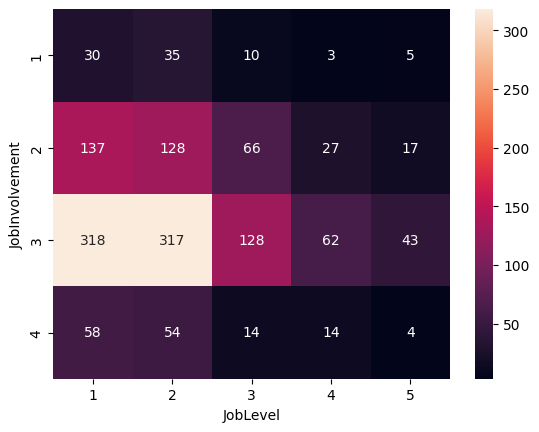

In [53]:
heat3 = (df.groupby(['JobInvolvement', 'JobLevel'])['Attrition'].size().unstack()).round(1)

sns.heatmap(heat3, annot=True, fmt='g')

In [54]:
df.groupby(['JobInvolvement', 'EnvironmentSatisfaction'])['Attrition'].size()

JobInvolvement  EnvironmentSatisfaction
1               1                           17
                2                           23
                3                           22
                4                           21
2               1                           74
                2                           60
                3                          124
                4                          117
3               1                          164
                2                          165
                3                          266
                4                          273
4               1                           29
                2                           39
                3                           41
                4                           35
Name: Attrition, dtype: int64

<Axes: xlabel='EnvironmentSatisfaction', ylabel='JobInvolvement'>

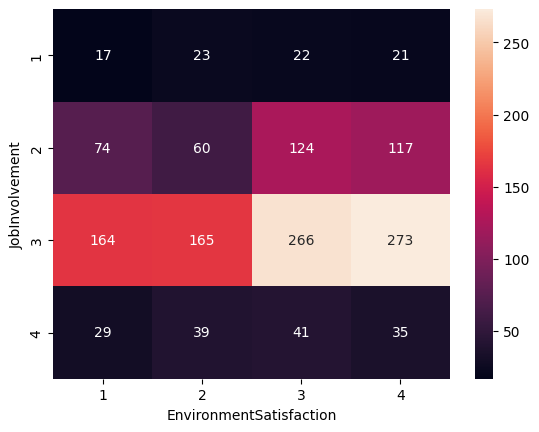

In [55]:
counts = (df.groupby(['JobInvolvement','EnvironmentSatisfaction'])['Attrition'].size().unstack())

sns.heatmap(counts, annot=True, fmt='g')